In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-ticks')

SMALL_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

In [5]:
#Load the CSV into a Pandas Dataframe
videogame_data = pd.read_csv('videogame-sales.csv')

# GAME SALE DATASET 
#### ** 1 unit in sale column represents 1 million sales **

In [55]:
videogame_data.head(10000)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
9995,9997,Army Men: Soldiers of Misfortune,DS,2008.0,Shooter,Zoo Games,0.11,0.00,0.00,0.01,0.12
9996,9998,GT Advance 2: Rally Racing,GBA,2001.0,Racing,THQ,0.08,0.03,0.00,0.00,0.11
9997,9999,Mystery P.I. - Portrait of a Thief,DS,2008.0,Adventure,Unknown,0.11,0.00,0.00,0.01,0.11
9998,10000,Yakuza,PS3,2012.0,Action,Sega,0.00,0.00,0.11,0.00,0.11


In [198]:
videogame_data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# AVERAGE NUMBER OF THE SALE IN EACH PLATFORM #

In [169]:
# Find "average" number of unit sale for each platform
each_platform_sale = videogame_data.groupby('Platform')['Global_Sales'].mean()

# Display in decending order (max => min)
each_platform_sale.sort_values(ascending=False)

Platform
GB      2.606633
NES     2.561939
GEN     1.050370
SNES    0.837029
PS4     0.827679
X360    0.774672
2600    0.729925
PS3     0.720722
Wii     0.699404
N64     0.686144
XOne    0.662254
PS      0.610920
PS2     0.581046
WiiU    0.572448
3DS     0.486169
GBA     0.387470
DS      0.380254
GC      0.358561
XB      0.313422
SCD     0.311667
DC      0.307115
PC      0.269604
PSP     0.244254
WS      0.236667
SAT     0.194162
PSV     0.149952
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: Global_Sales, dtype: float64

<AxesSubplot:xlabel='Platform', ylabel='Unit in Million'>

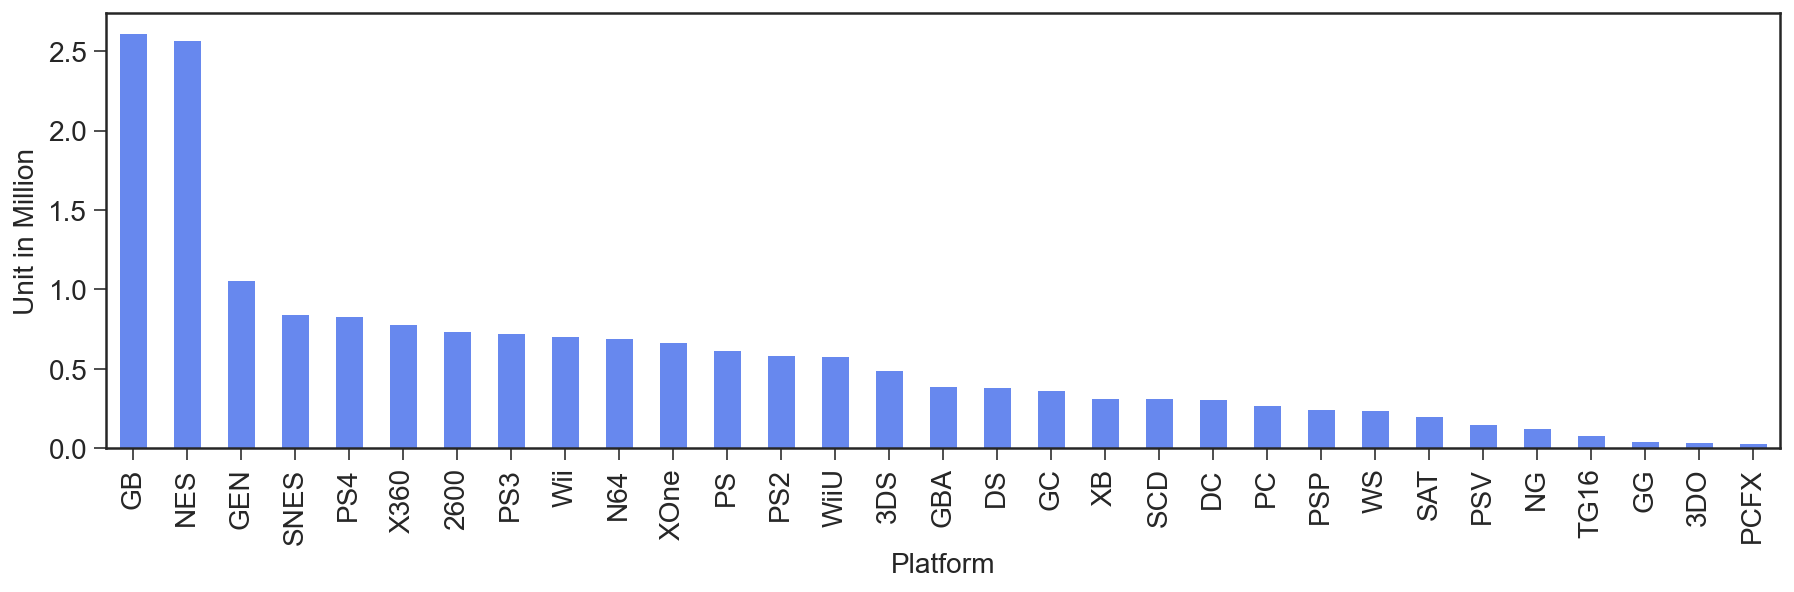

In [214]:
plt.figure(figsize=(15, 4))

# plot bar graph 
each_platform_sale.sort_values(ascending=False).plot(kind="bar", ylabel="Unit in Million")

### README ###


##### OBEJECTIVE #####

I have concerned that each platform might affect the sale unit. Therefore, I started to find the average of global unit sale for each platform. 

##### METHOD #####

Starting by, I try to use "group by" function to group the data that have a same platform together, and then I find the average of global unit sale in each group by using "mean" function. After getting those grouped data, I display it into a list with decending order and also visualize it by plotting bar graph

##### RESULT #####

As we see from our list or bar graph, GB, Gameboy, platform has the highest average unit sale overall, 2.6 millions. Sequentially, NES, Nintendo Entertainment System, platform has the second top-most highest average unit sale overall, 2.56 millions. And, the least average unit sale, 0.03 million, in the list is PCFX platform.

##### CONCLUSION & ANALYSIS #####

What we get from the list, we see that GB and NES nearly have a same unit sale. And the rest tremendously have a different unit sale comparing from both of them. From my standpoint, due to the first generation game, in other words, one of the most LONG-STANDING platform, GB and NES have been widely known from many people. Certainly, their unit sale of their console are high. Even though, nowaday those platforms aren't popular as same as in the past, undoubtedly it was the one of the most long-standing platform. 

Moreover, talking about a prominent platform nowadays: PS4, PC, etc., even though its unit sale is unable to compare with GB or NES, these technological advancements are still rapidly imporved. The game quality have been improved which can attract others which will increase the unit sell later on.

However, we CANNOT conclude that if we have a new game which will be published into those consoles (such as, GB) that can create a high number of unit sale in the past, it will also create a great profit nowadays. Because nowadays there are many new gaming consoles that are better than those old generation consoles that those modern console have a better graphic and gameplay quality.

# AVERAGE NUMBER OF THE SALE FOR EACH PUBLISHER #

In [176]:
# Find "average" number of unit sale for each publisher
each_publisher_sale = videogame_data.groupby('Publisher')['Global_Sales'].mean()

# Display in decending order (max => min)
each_publisher_sale.sort_values(ascending=False)

Publisher
Palcom                       4.170000
Red Orb                      2.620000
Nintendo                     2.541337
Arena Entertainment          2.360000
UEP Systems                  2.250000
                               ...   
Paradox Development          0.010000
Commseed                     0.010000
Nitroplus                    0.010000
Boost On                     0.010000
EON Digital Entertainment    0.010000
Name: Global_Sales, Length: 578, dtype: float64

#### *NOTE THAT, as we see, there are a lot of publishers; therefore, plotting bar graph, we will only select top 15 publishers who can create highest unit sales

<AxesSubplot:xlabel='Publisher', ylabel='Unit in Million'>

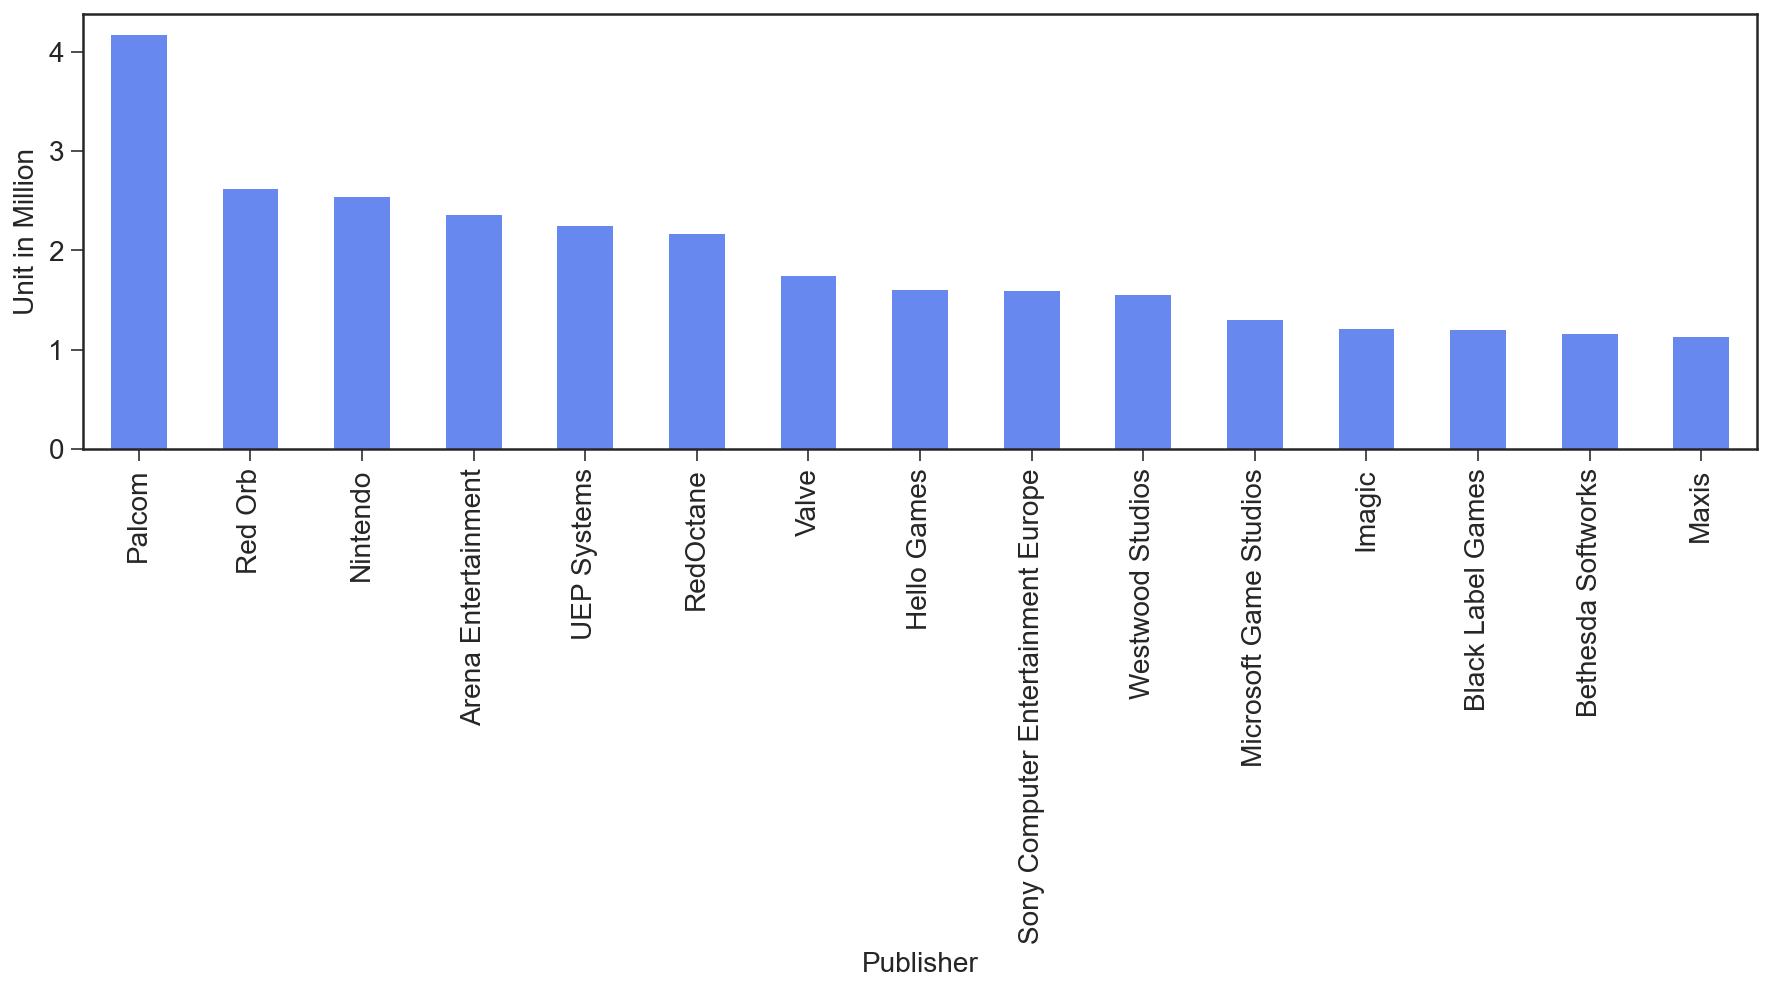

In [217]:
plt.figure(figsize=(15, 4))

# plot bar graph 
each_publisher_sale.nlargest(15).sort_values(ascending=False).plot(kind="bar", ylabel="Unit in Million")

### README ###

##### OBEJECTIVE #####

I have concerned that each publisher might also affect the sale unit because great publishers have their own standard when they create game. Therefore, I think that people trend to buy the games if those come from a well-konwn publishers. So, I decided to find the average of global unit sale for each publisher. 

##### METHOD #####

Starting by, I try to use "group by" function to group the data that have a same publisher together, and then I find the average of global unit sale in each group by using "mean" function. After getting those grouped data, I display it into a list with decending order and also visualize the top 15 publishers who can create highest unit sales by plotting bar graph.

##### RESULT #####

As we see from our list or bar graph, Palcom has a highest sale, which has 4.17 million unit game sales, and followed by Red Orb, 2.62 million, which then followed by Nintendo, 2.54 million. On the other hands, EON Digital Entertainment has a lowest sale, 0.01 million, in the list.

##### CONCLUSION & ANALYSIS #####

As we see in the result, Palcom created highest unit game sale overall and followed by Red Orb and Nintendo. In fact, from these publishers, all came from the first game generation which those games were published in GB and NES console/platform. Undoubtedly, the result from this graph relates to the first graph information (average number of unit sale for each platform), which GB and NES create highest and second highest unit game sale overall.

Nevertheless, if we have a new coming game from those publishers, we still cannot guarantee that those games will create profit as well as in the past. Some publishers, such as Palcom and Red Orb, are being forgotten nowadays, unlike Nintendo and Sony whose company have continuously grown. 

# AVERAGE NUMBER OF THE SALE FOR EACH GENRE #

In [155]:
# Find "average" number of unit sale for each genre
each_genre_sale = videogame_data.groupby('Genre')['Global_Sales'].mean()

# Display in decending order (max => min)
each_genre_sale.sort_values(ascending=False)

Genre
Platform        0.938341
Shooter         0.791885
Role-Playing    0.623233
Racing          0.586101
Sports          0.567319
Fighting        0.529375
Action          0.528100
Misc            0.465762
Simulation      0.452364
Puzzle          0.420876
Strategy        0.257151
Adventure       0.185879
Name: Global_Sales, dtype: float64

<AxesSubplot:xlabel='Genre', ylabel='Unit in Million'>

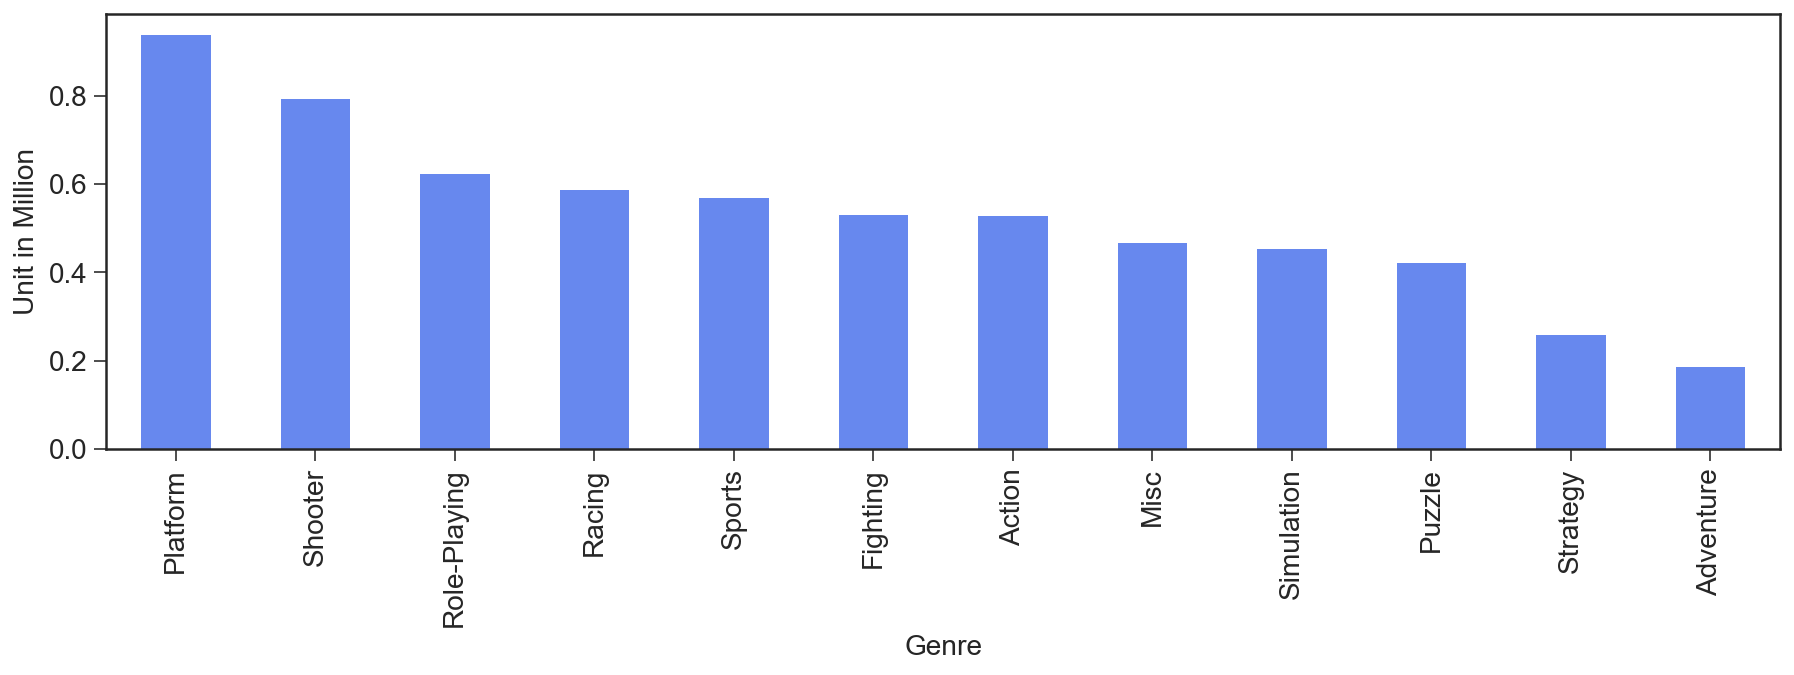

In [212]:
plt.figure(figsize=(15, 4))

# plot bar graph 
each_genre_sale.sort_values(ascending=False).plot(kind="bar", ylabel="Unit in Million")

### README ###

##### OBEJECTIVE #####

In this one, it is an essential topic that we need to carefully concern because poeple's preference is one the most important factor that poeple use to decide whether they should buy that game or not. The difference of game's genre focus a different customer target group (such as, children, adult, etc.). In fact, each group has a different number of people which definitely affect their unit game sale. Therefore, finding unit game sale which based on each game's genre is very important to study.

##### METHOD #####

Starting by, I try to use "group by" function to group the data that have a same game's genre together, and then I find the average of global unit sale in each group by using "mean" function. After getting those grouped data, I display it into a list with decending order and also visualize it by plotting bar graph.

##### RESULT #####

As we see from our list or bar graph, platform game, which its core objective is to move the player character between points in a rendered environment, created the highest average game unit sale, 0.938 million and followed by shooting game, which has 0.791 million. And, lastly, adventure category surprisingly has a least unit game sale, 0.185 million.

##### CONCLUSION & ANALYSIS #####

Firstly, talking about platform game, it isn't surprise from my standpoint. In fact, platfrom game have been used since the first game generation came beacause it is the one of game's categories that is easliy created than others, and due to low technological advancement in the past, platform game is a great choice to be choosen in the past. Moreover, until now, this game category is still popular because this game type is easily to understand to play and enjoyable at the same time as same as shooting genre.

Surprisingly, advanture game market isn't popular as others. Even though narrative is the main advantage in these games, it might also create an unnecessary difficulty to player (such as, solving the puzzle). And, also, people can watch others' play, instead playing by themseleves, via internet media.

Although "time" might not affect people's preference that much, I still think that it still have some factors that can also affect people to change their perference over the time. For instance, a better technology causes a better game graphic which people might change their genre to be another that based on picture or animation, such as, shooting game.

# AVERAGE NUMBER OF THE SALE IN EACH REGION #

In [218]:
# Find "average" number of unit sale for each region (represented in different column)
each_region_sale = videogame_data.iloc[:, [6, 7, 8, 9]].mean()

# Display in decending order (max => min)
each_region_sale.sort_values(ascending=False)

NA_Sales       0.264667
EU_Sales       0.146652
JP_Sales       0.077782
Other_Sales    0.048063
dtype: float64

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='Sale Ratio in Each Region'>

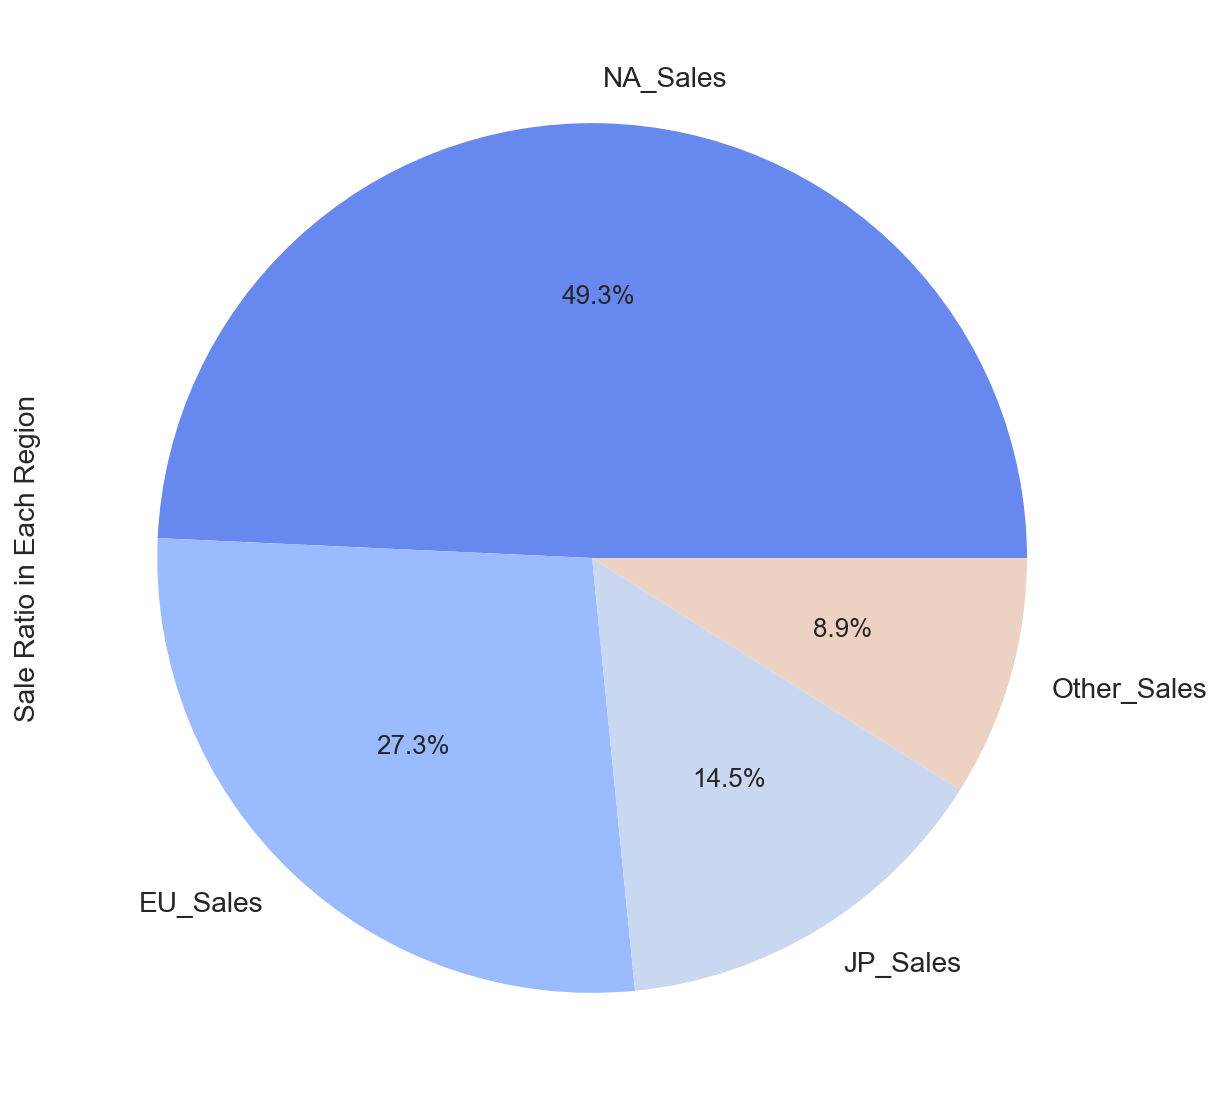

In [221]:
plt.figure(figsize=(10, 10))

# create pie graph 
each_region_sale.sort_values(ascending=False).plot(kind="pie", normalize=True, ylabel='Sale Ratio in Each Region', autopct='%1.1f%%')

### README ###

##### OBEJECTIVE #####

Different region has a different number of poeple which definitely cause a different sale. In fact, my objective is to determine the mean of sale ratio in each region. 

##### METHOD #####

Starting by, I use "iloc" to select observed columns which are NA_Sales (column 6), EU_Sales (column 7), JP_Sales (column 8), and Other_Sales (column 9). Then I find the average of unit sale in each region by using "mean" function. After getting those grouped data, I display it into a list with decending order and also visualize it by plotting pie chart.

##### RESULT #####

As we see from our list or pie chart, NA_Sales, North America, craetes the highest sale overall, 0.264 millions or 49.3% from the total sale, and followed by EU_Sales, Europe, which create 0.146 million or 27.3% from the total sale. Then, JP_Sales, Japan, which can create 0.077 million or 14.5% from the total sale. And the rest can only create 0.04 million or 8.9% from the total sale.

##### CONCLUSION & ANALYSIS #####

Even though selling in North America might be a great idea to have a profit, from my standpoint, it isn't always because the sale might not be profitable if the target group isn't located in that region. In fact, this is another considered factor that we need to look at.

# AVERAGE NUMBER OF THE SALE IN EACH PUBLISHED YEAR #

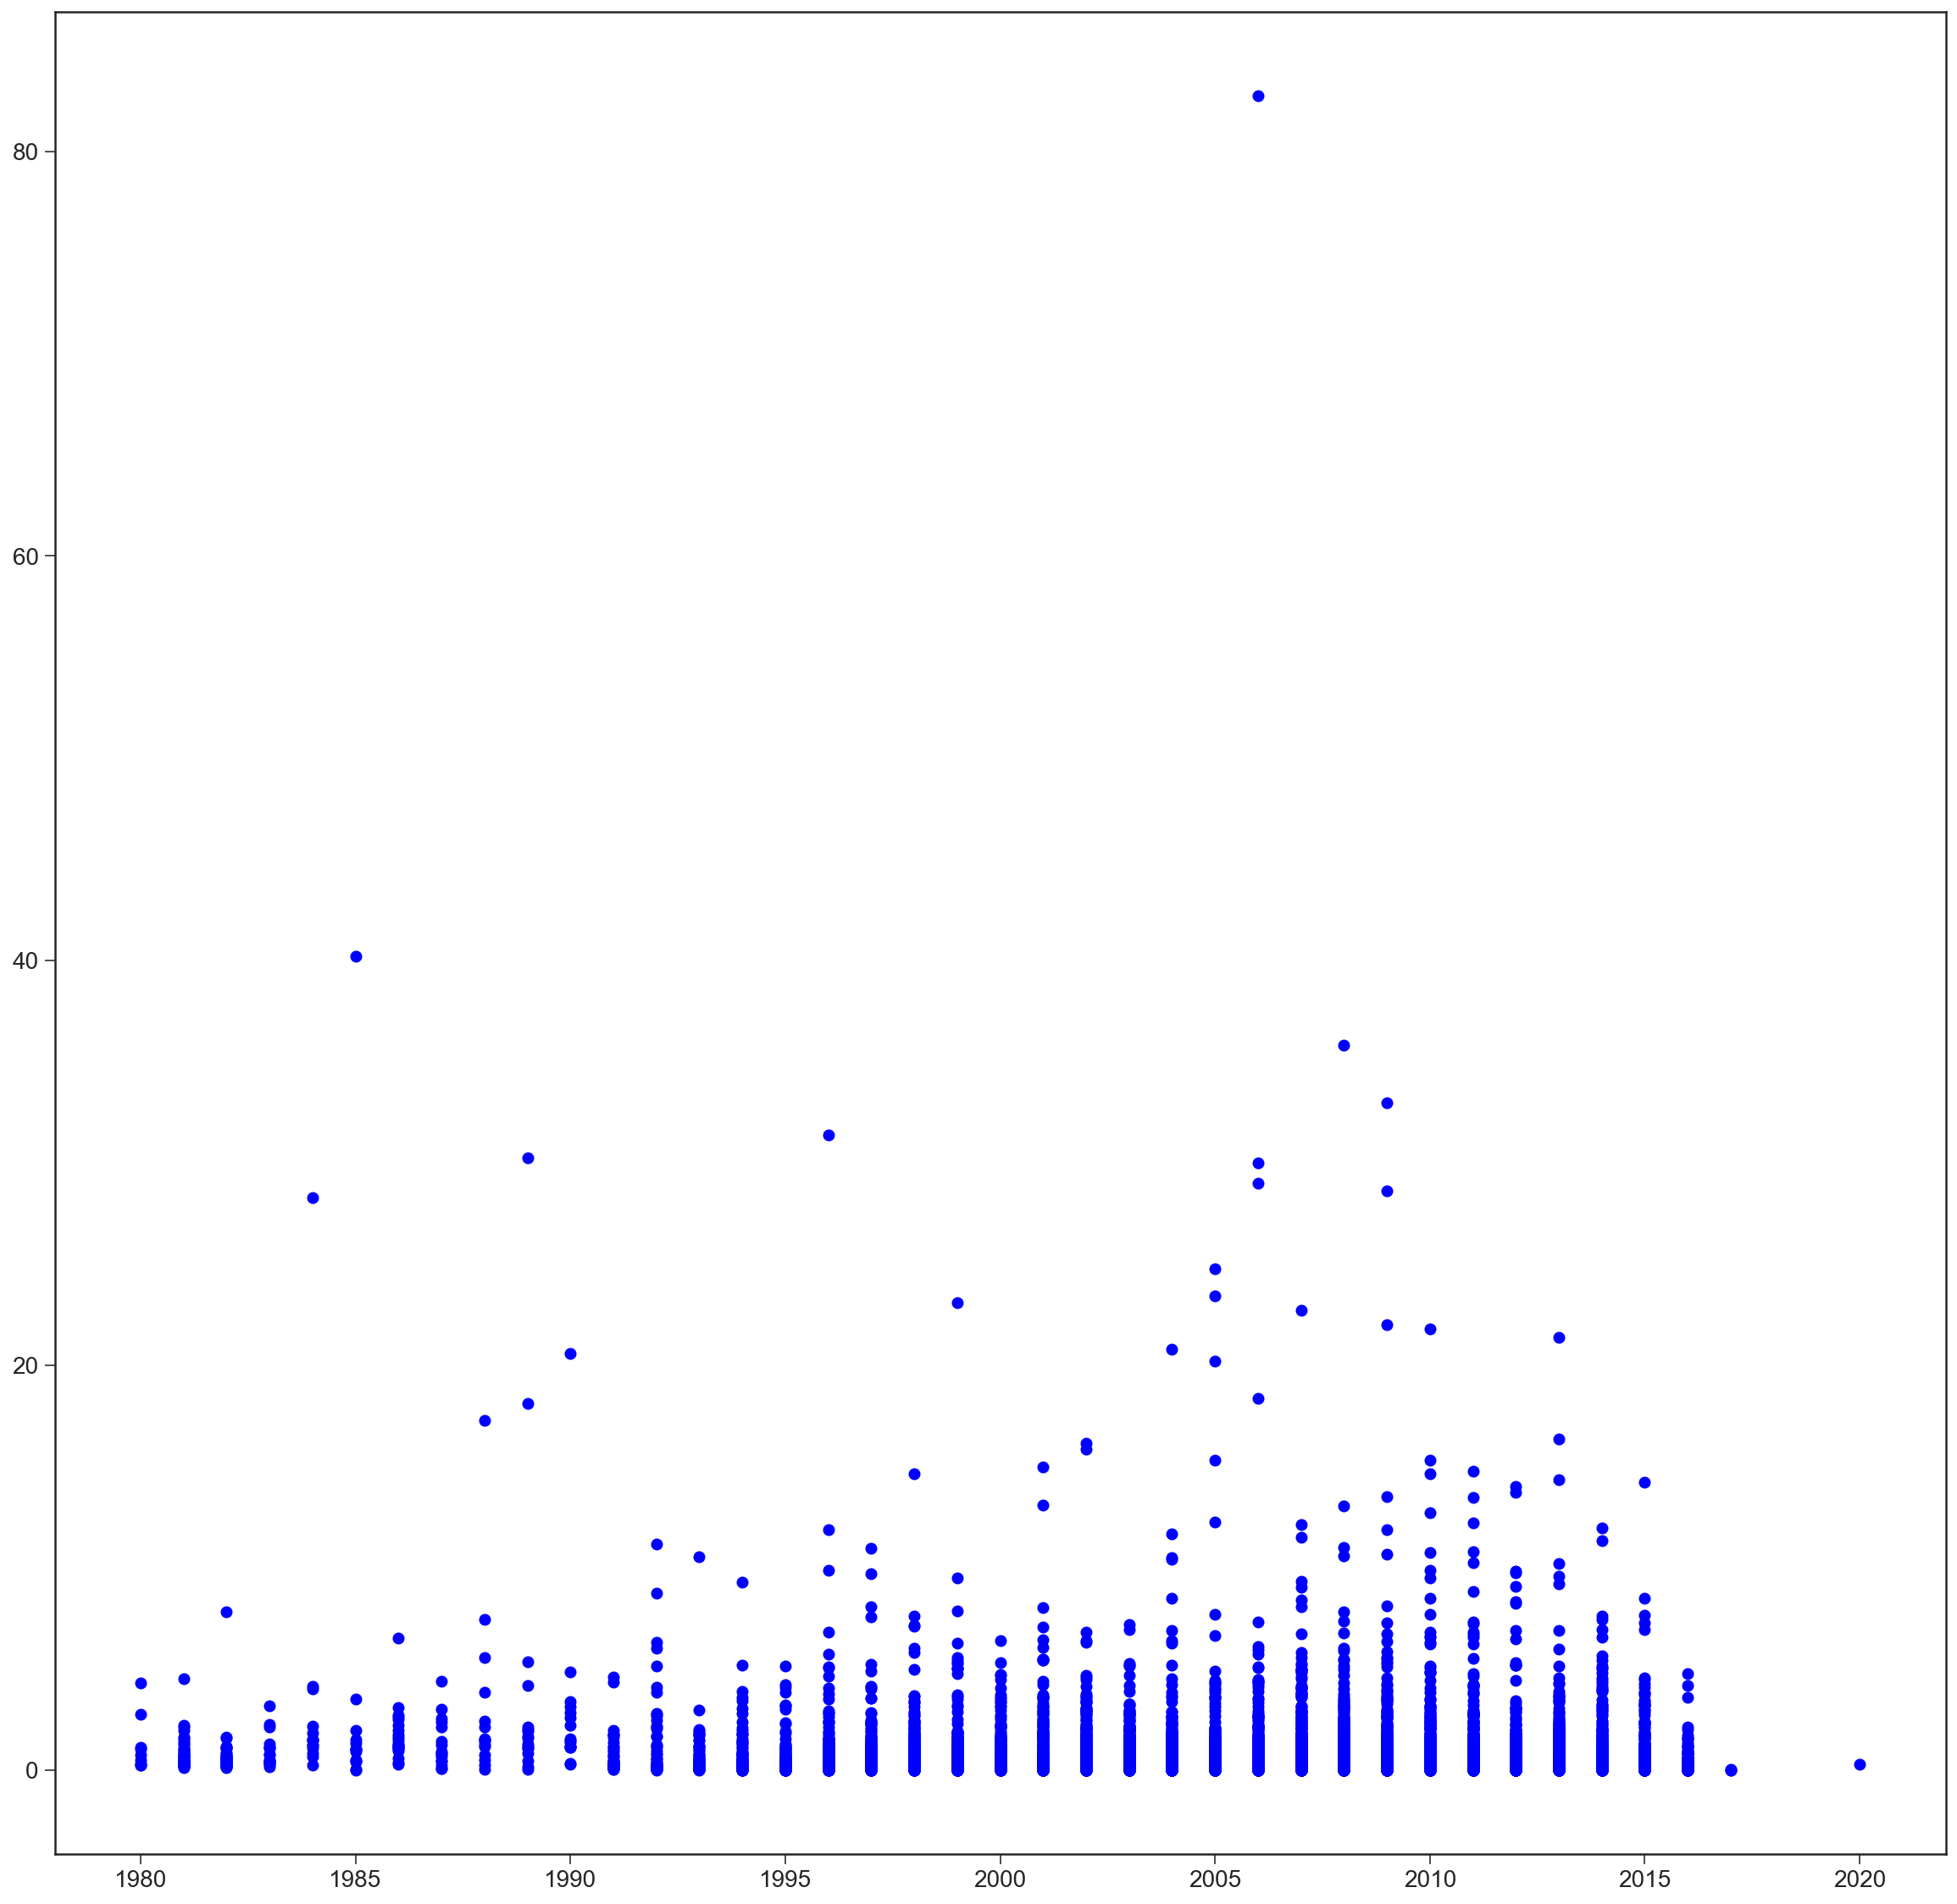

In [236]:
plt.figure(figsize=(20, 20))

# Creating scatter plot
x = videogame_data['Year']
y = videogame_data['Global_Sales']
plt.plot(x, y, 'o', color='blue');

#### *NOTE THAT sales in some game are still updating, not complete. In fact, they are still being manufactured continuously until nowadays

### README ###

##### OBEJECTIVE #####

My objective is to roughly estimate the unit game sale over their published year. However, noted again, this might only be accurate to estimate the games that were published during 1980 to ~2015 but not for previous years ago because we need to carefully understand that some games are STILL being manufactured continuously until nowadays which their sales might be updated again in the future. Nevertheless, the result from this observation might be used to plot a model for the future sales estimation (such as, regression).

##### METHOD #####

I try to create a scatter plot by declaring x variable as a x-axis that represents published year of the game and y variable as a y-axis that represents each unit game sale in million. Then, I plot the graph by putting those x and y variables into "plot" function.

##### RESULT #####

From the plot, we see that nowadays games rougly trend to sell a higher unit comparing to the past.

##### CONCLUSION & ANALYSIS #####

In the fact that the improvement of technology, the game might become more attractive due to its improved game quality. Undoubtedly, from these game improvement, it is one of the esstential factor that can increase the unit game sale. Moreover, as we mentioned, some modern game are still being manufactured continuously; hence, its unit sale might be further increased.

# CHECK A "POPULARITY" OF EACH PLATFORM OVER THE GENERATION #

<AxesSubplot:xlabel='Year', ylabel='Platform'>

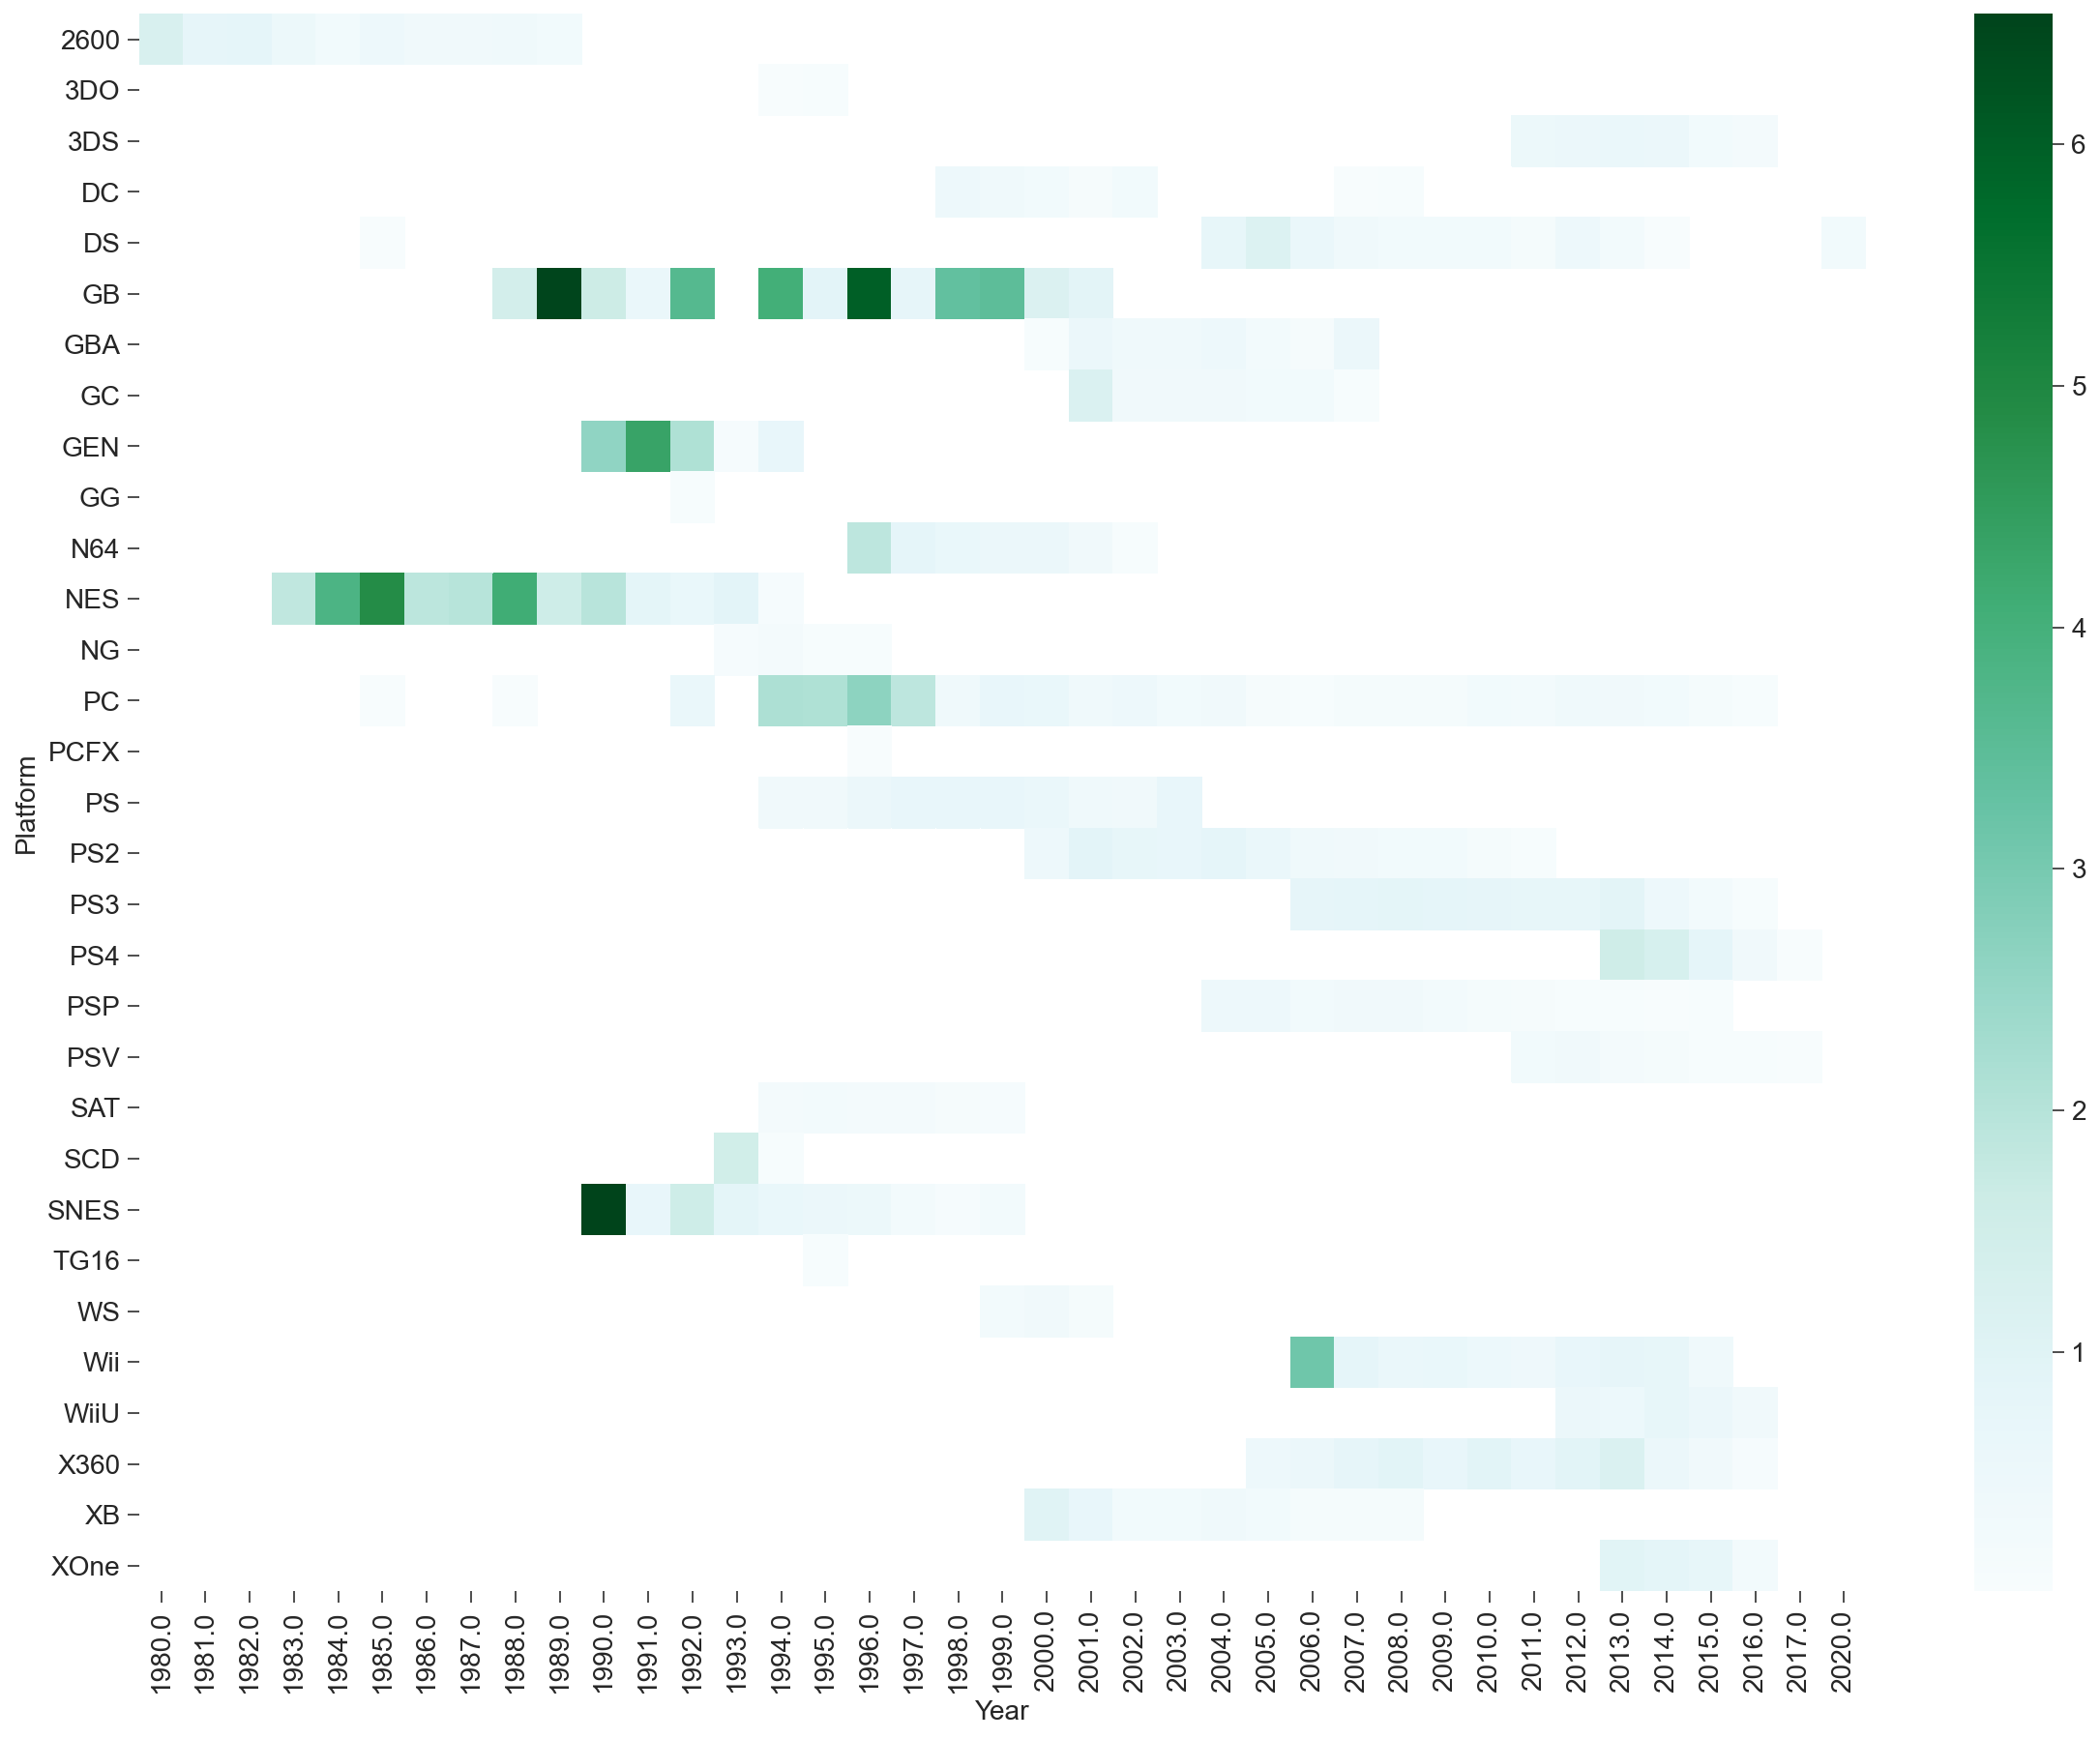

In [242]:
# Create heat map to check popularity of each platform over generation
heatmap_data = pd.pivot_table(videogame_data, values='Global_Sales', 
                     index=['Platform'],
                     columns='Year')

plt.figure(figsize=(20, 15))
sns.heatmap(heatmap_data, cmap="BuGn")

### README ###


##### OBEJECTIVE #####

This is also a very important topic that we need to carefully concern because this is going to visualize our considered point that we have already discussed in the first graph which is about even though some platforms were popular in the past, it doesn't mean that if there is a new upcoming game and will be published into those platforms, it will create a high number of unit sale as same as in the past.

##### METHOD #####

In this time, I try to create heatmap which I label y-axis as gaming platform and x-axis the range of year. And, I also give Global_Sales as a value in heatmap which in fact, it tells the total unit game sale in each particular year that each plaform can sell.

##### RESULT #####

GB is one of the most popular console during around 1988 to 2000. However, it have completely lost later on. If we carefully look the heatmap, the one of the most popular platform in nowadays is likely be PS4, DS, etc.

##### CONCLUSION & ANALYSIS #####

As we see, the result is same with our discussion that GB, which was represented the platform that could sell their games in highest unit among others, doesn't mean that it will give a great sold unit in the present because, as we see, there is no GB game that is sold in these previous years until now. In fact, there are new upcoming gaming consoles, such as PS4, that contain a better graphic and gameplay quality games inside.